# 3주차 과제

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## 한글 문제해결
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

## EDA / Preprocessing

In [4]:
df_train = pd.read_csv("train.csv")

In [5]:
df_train

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,31/10/2018,1507,19,8.4,53,NaN,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes
8036,31/10/2018,1176,20,7.6,59,0.7,2000,0.0,0.0,0.0,0.0,NaN,No Holiday,Yes
8037,31/10/2018,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
8038,31/10/2018,1088,22,6.8,58,2.2,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
df_test = pd.read_csv("test.csv")
df_test

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/11/2018,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,01/11/2018,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,01/11/2018,2,4.4,64,NaN,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,01/11/2018,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,01/11/2018,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
716,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
717,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
718,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


- Rented Bike Count 열만 다르고 나머지는 모두 동일하므로 동일하게 전처리하기 위해 병합

In [7]:
y_train = df_train["Rented Bike Count"]

In [8]:
df_train = df_train.drop(labels="Rented Bike Count", axis= 1)

In [9]:
df_train = pd.concat([df_train, df_test], ignore_index= True)

In [10]:
print(df_train.info())
print(df_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Hour                       8760 non-null   int64  
 2   Temperature(째C)            7884 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           7884 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(째C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    7884 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
dtypes: float64(6), int64(3), object(4)
memory usage:

In [11]:
df_train.isnull().sum()

Date                           0
Hour                           0
Temperature(째C)              876
Humidity(%)                    0
Wind speed (m/s)             876
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      876
Holiday                        0
Functioning Day                0
dtype: int64

- 기온, 풍속, 게절 피처에 결측값 존재
    - 기온 및 풍속은 시간별로 나열된 데이터임을 감안하여 보간법을 사용
    - 계절은 날짜에 맞은 게절을 채워 넣으면 될 듯 하다.

In [12]:
print("계절 정보 : \n",df_train["Seasons"].value_counts())
print("휴일 정보 : \n",df_train["Holiday"].value_counts())
print("기능 정보 : \n",df_train["Functioning Day"].value_counts())

계절 정보 : 
 Seasons
Spring    1990
Summer    1990
Autumn    1969
Winter    1935
Name: count, dtype: int64
휴일 정보 : 
 Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64
기능 정보 : 
 Functioning Day
Yes    8465
No      295
Name: count, dtype: int64


- 범주형 자료들로 변수 인코딩이 필요해 보인다.

<Axes: ylabel='Temperature(째C)'>

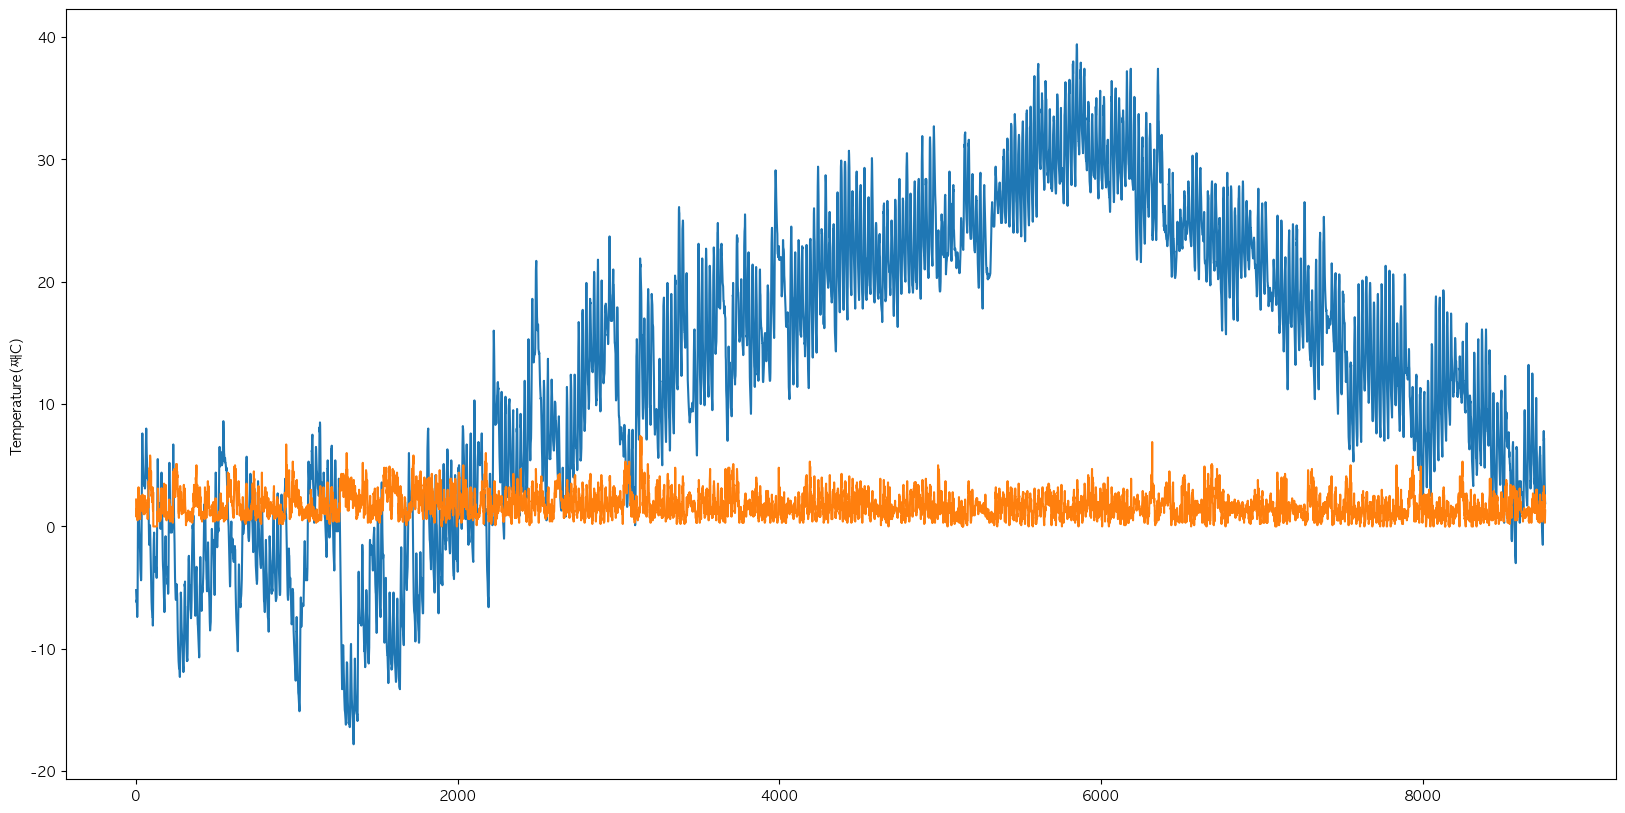

In [13]:
## 시각화
m, n = df_train.shape
x = np.linspace(1, m, m)

plt.figure(figsize=(20, 10))
sns.lineplot(data = df_train, x = x, y = "Temperature(째C)")
sns.lineplot(data = df_train, x = x, y = "Wind speed (m/s)")

In [14]:
## 시게열 데이터로 1차 선형 보간법을 사용

In [15]:
df_train = df_train.interpolate(method= "linear")

In [16]:
df_train.groupby("Seasons")[["Date"]].agg([min, max])

Date            
                min         max
Seasons                        
Autumn   01/09/2018  31/10/2018
Spring   01/03/2018  31/05/2018
Summer   01/06/2018  31/08/2018
Winter   01/01/2018  31/12/2017

- 데이터에 11월이 제외되어있는 것을 고려했을 월별 계절
    -  3 ~  5 : spring
    -  6 ~  8 : summer
    -  9 ~ 11 : autumn
    - 12 ~  2 : winter

In [17]:
df_train["Date"] = pd.to_datetime(df_train["Date"], format= "%d/%m/%Y")
df_train["Date"].dt.year
df_train["Date"].dt.month
#df_train["Date"].dt.day

0       12
1       12
2       12
3       12
4       12
        ..
8755    11
8756    11
8757    11
8758    11
8759    11
Name: Date, Length: 8760, dtype: int32

In [18]:
df_train[df_train["Seasons"].isnull()]

## map 함수를 사용하여 효율적으로 채워넣기

season = {
    12 : "Winter", 1 : "Winter", 2 : "Winter",
    9  : "Autumn", 10: "Autumn", 11: "Autumn",
    6  : "Summer", 7 : "Summer", 8 : "Summer",
    3  : "Spring", 4 : "Spring", 5 : "Spring"
}
df_train["Seasons"].fillna(df_train["Date"].dt.month.map(season), inplace=True)


In [19]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Hour                       8760 non-null   int64         
 2   Temperature(째C)            8760 non-null   float64       
 3   Humidity(%)                8760 non-null   int64         
 4   Wind speed (m/s)           8760 non-null   float64       
 5   Visibility (10m)           8760 non-null   int64         
 6   Dew point temperature(째C)  8760 non-null   float64       
 7   Solar Radiation (MJ/m2)    8760 non-null   float64       
 8   Rainfall(mm)               8760 non-null   float64       
 9   Snowfall (cm)              8760 non-null   float64       
 10  Seasons                    8760 non-null   object        
 11  Holiday                    8760 non-null   object        
 12  Functi

-  결측치를 모두 처리한 것을 확인할 수 있다.

#### decompose 패키지를 이용한 시계열 이상치 탐지
- 기온, 습도, 풍속, 가시거리, 이슬점, 일조량을 확인

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
    

def detect_outliers_STL(df, feature, period):  

    ## STL decomposition
    result = seasonal_decompose(df[feature], model='additive', period = period)
    

    ## plotting
    plt.figure(figsize=(10,5))
    result.plot()
    plt.show()

    ## 이상치 탐색
    residuals = result.resid
    outliers = residuals[abs(residuals) > 3 *residuals.std()] ## 계절성 패턴은 이상치가 유효한 패턴일 수도 있으므로 기준을 2 > 3으로 완화
    
    return outliers

<Figure size 1000x500 with 0 Axes>

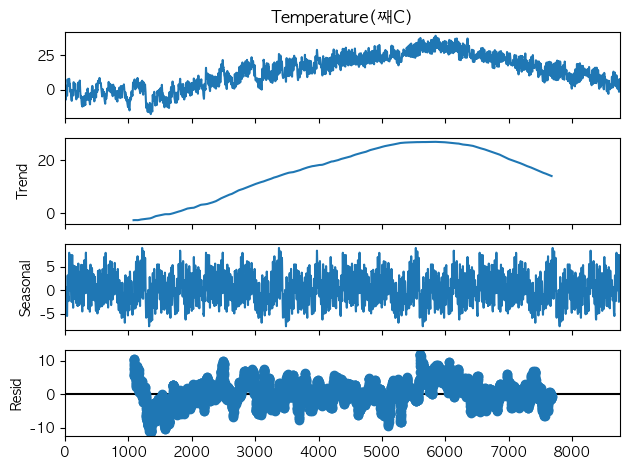

In [21]:
# 3개월 계절을 기준으로

## 기온
Temp_anomaly = detect_outliers_STL(df_train, "Temperature(째C)", 720 * 3) 


In [22]:
df_train.loc[Temp_anomaly.index]

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1330,2018-01-25,10,-15.30,33,2.4,2000,-27.9,0.56,0.0,0.6,Winter,No Holiday,Yes
1331,2018-01-25,11,-13.80,25,3.5,1996,-29.6,0.91,0.0,0.6,Winter,No Holiday,Yes
1332,2018-01-25,12,-12.80,25,3.2,1981,-28.7,1.16,0.0,0.6,Winter,No Holiday,Yes
1333,2018-01-25,13,-11.40,27,3.9,2000,-26.7,1.26,0.0,0.6,Winter,No Holiday,Yes
1334,2018-01-25,14,-10.40,25,2.3,1981,-26.7,1.21,0.0,0.5,Winter,No Holiday,Yes
1335,2018-01-25,15,-9.70,28,3.7,2000,-24.8,1.00,0.0,0.5,Winter,No Holiday,Yes
1337,2018-01-25,17,-10.90,32,4.0,2000,-24.4,0.28,0.0,0.5,Winter,No Holiday,Yes
1338,2018-01-25,18,-11.80,33,4.0,2000,-24.8,0.04,0.0,0.5,Winter,No Holiday,Yes
1339,2018-01-25,19,-12.70,33,3.7,2000,-25.6,0.00,0.0,0.5,Winter,No Holiday,Yes
1353,2018-01-26,9,-17.50,37,3.8,1941,-28.7,0.21,0.0,0.5,Winter,No Holiday,Yes


- 매우 추웠거나 매우 더운 날일뿐 특별한 이상치로 확인되지는 않는다.

<Figure size 1000x500 with 0 Axes>

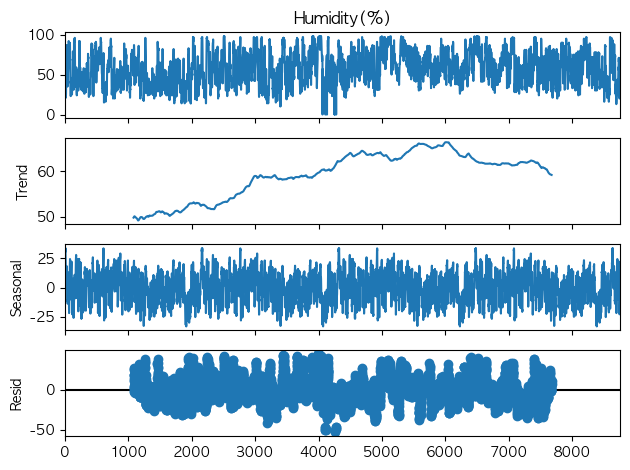

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
4106,2018-05-21,2,13.9,0,0.900000,2000,-2.1,0.00,0.0,0.0,Spring,No Holiday,Yes
4107,2018-05-21,3,13.0,0,0.800000,2000,-2.5,0.00,0.0,0.0,Spring,No Holiday,Yes
4108,2018-05-21,4,12.4,0,0.800000,2000,-3.4,0.00,0.0,0.0,Spring,No Holiday,Yes
4109,2018-05-21,5,11.9,0,1.300000,2000,-2.7,0.00,0.0,0.0,Spring,No Holiday,Yes
4110,2018-05-21,6,11.4,0,0.900000,2000,-2.0,0.03,0.0,0.0,Spring,No Holiday,Yes
4111,2018-05-21,7,12.3,0,1.100000,1989,-2.7,0.48,0.0,0.0,Spring,No Holiday,Yes
4253,2018-05-27,5,17.6,0,0.800000,1304,9.7,0.00,0.0,0.0,Spring,No Holiday,Yes
4255,2018-05-27,7,17.6,0,1.433333,1219,8.7,0.34,0.0,0.0,Spring,No Holiday,Yes
4276,2018-05-28,4,17.2,0,0.400000,1619,8.8,0.00,0.0,0.0,Spring,No Holiday,Yes
4277,2018-05-28,5,16.6,0,0.900000,1361,9.7,0.00,0.0,0.0,Spring,No Holiday,Yes


In [23]:
## 습도
Humidity_anomaly = detect_outliers_STL(df_train, "Humidity(%)", 720 *3)

df_train.loc[Humidity_anomaly.index]

- 습도가 90프로가 넘어가는 수치일때는 비가 오거나, 안개 등의 상황이 있을 수 있다. 실제로 높은 습도일때 강수량이 잡히는 것을 확인해 볼 수 있다.
- 그러나 습도가 0프로라는 것은 이상하다. 확인이 필요해 보인다.

In [24]:
## 습도가 0인 부분의 주변값을 확인하여 확인해보자
 
df_train.loc[np.r_[4100:4121, 4250:4261, 4270:4286]]


,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
4100,2018-05-20,20,19.00,26,1.650000,2000,-0.9,0.02,0.0,0.0,Spring,No Holiday,Yes
4101,2018-05-20,21,17.80,26,1.300000,2000,-1.9,0.00,0.0,0.0,Spring,No Holiday,Yes
4102,2018-05-20,22,16.80,29,1.200000,2000,-1.3,0.00,0.0,0.0,Spring,No Holiday,Yes
4103,2018-05-20,23,15.80,30,1.100000,2000,-1.7,0.00,0.0,0.0,Spring,No Holiday,Yes
4104,2018-05-21,0,15.30,29,1.300000,2000,-2.6,0.00,0.0,0.0,Spring,No Holiday,Yes
4105,2018-05-21,1,14.60,31,1.100000,2000,-2.4,0.00,0.0,0.0,Spring,No Holiday,Yes
4106,2018-05-21,2,13.90,0,0.900000,2000,-2.1,0.00,0.0,0.0,Spring,No Holiday,Yes
4107,2018-05-21,3,13.00,0,0.800000,2000,-2.5,0.00,0.0,0.0,Spring,No Holiday,Yes
4108,2018-05-21,4,12.40,0,0.800000,2000,-3.4,0.00,0.0,0.0,Spring,No Holiday,Yes
4109,2018-05-21,5,11.90,0,1.300000,2000,-2.7,0.00,0.0,0.0,Spring,No Holiday,Yes


- 역시 습도가 급격하게 변하는 것을 확인할 수 있다.
- 습도가 0인것은 결측치로 보고 보간법으로 채워 넣으면 될듯 하다.

In [25]:
## 습도가 0인 수치들을 모두 결측값 처리
idx = df_train[df_train["Humidity(%)"] == 0].index

df_train.loc[idx, "Humidity(%)"] = np.nan



<Figure size 1000x500 with 0 Axes>

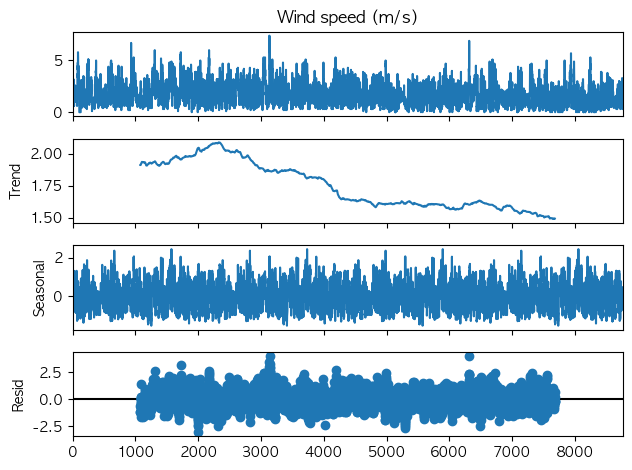

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1309,2018-01-24,13,-12.0,25.0,6.000000,1887,-28.0,1.27,0.0,0.9,Winter,No Holiday,Yes
1723,2018-02-10,19,-3.1,14.0,5.100000,2000,-26.9,0.00,0.0,0.0,Winter,No Holiday,Yes
1724,2018-02-10,20,-4.4,19.0,5.800000,2000,-24.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1993,2018-02-22,1,-2.2,58.0,0.366667,2000,-9.3,0.00,0.0,0.0,Winter,No Holiday,Yes
1994,2018-02-22,2,-2.5,57.0,0.000000,1985,-10.2,0.00,0.0,0.0,Winter,No Holiday,Yes


In [26]:
## 풍속
# Wind speed (m/s)          

windSpeed_anomaly = detect_outliers_STL(df_train, "Wind speed (m/s)", 720 * 3)
df_train.loc[windSpeed_anomaly.index].head()

- 큰 문제 없어보인다

<Figure size 1000x500 with 0 Axes>

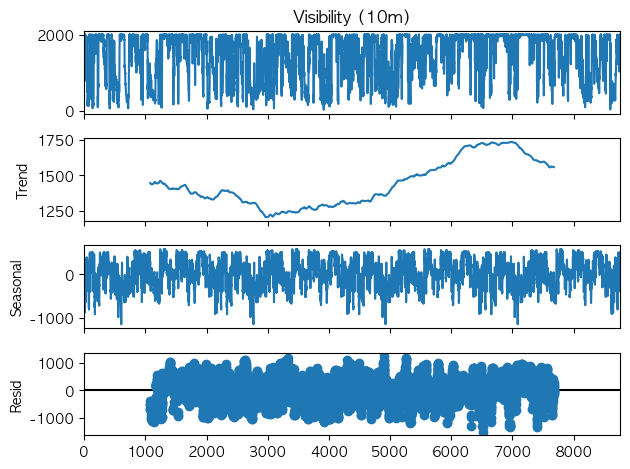

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
6524,2018-08-29,20,23.4,98.0,0.6,70,23.0,0.0,21.0,0.0,Summer,No Holiday,Yes


In [27]:
## 가시거리
## Visibility (10m)  
visibility_anomaly = detect_outliers_STL(df_train, "Visibility (10m)", 720 * 3)
df_train.loc[visibility_anomaly.index]


- 가시거리 또한 크게 문제되는 수치는 없는 것 같다

<Figure size 1000x500 with 0 Axes>

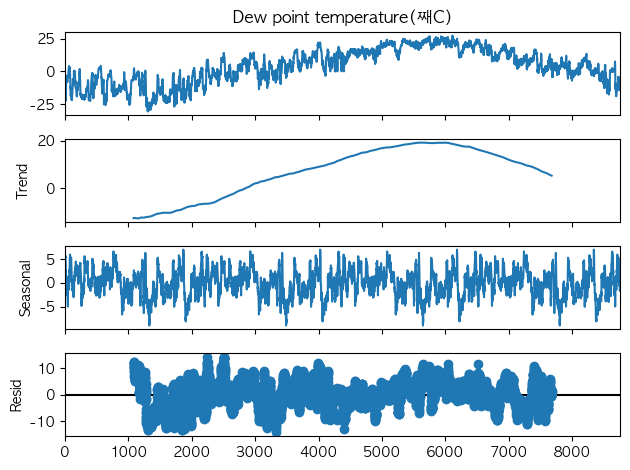

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


In [28]:
## 이슬점
## Dew point temperature(째C)

dewPoint_anomaly = detect_outliers_STL(df_train, "Dew point temperature(째C)", 720 * 3)
df_train.loc[dewPoint_anomaly.index]


- 이상치 X

<Figure size 1000x500 with 0 Axes>

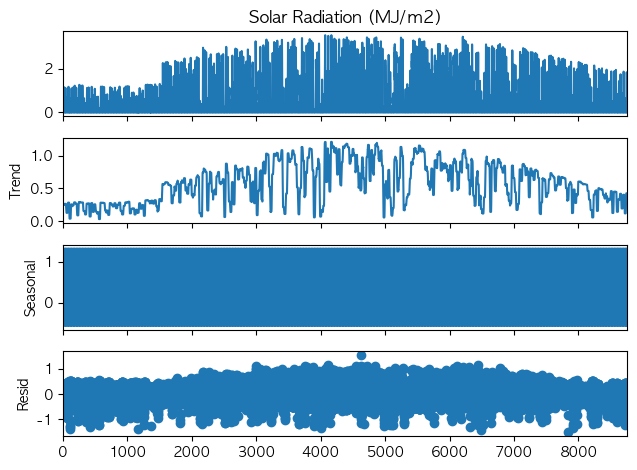

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
108,2017-12-05,12,-2.300000,25.0,0.00,1962,-19.7,0.00,0.0,0.0,Winter,No Holiday,Yes
109,2017-12-05,13,-1.600000,27.0,0.00,1955,-18.2,0.00,0.0,0.0,Winter,No Holiday,Yes
110,2017-12-05,14,-1.100000,28.0,0.00,2000,-17.3,0.00,0.0,0.0,Winter,No Holiday,Yes
420,2017-12-18,12,-1.833333,83.0,1.20,351,-4.3,0.09,1.1,5.1,Winter,No Holiday,Yes
421,2017-12-18,13,-0.900000,84.0,1.20,333,-3.2,0.09,0.0,5.0,Winter,No Holiday,Yes
564,2017-12-24,12,4.100000,91.0,0.80,404,2.7,0.07,9.5,0.0,Winter,Holiday,Yes
565,2017-12-24,13,3.700000,90.0,0.70,744,2.2,0.15,0.0,0.0,Winter,Holiday,Yes
1164,2018-01-18,12,2.500000,72.0,2.50,256,-2.0,0.00,0.0,0.0,Winter,No Holiday,Yes
1261,2018-01-22,13,3.900000,33.0,0.60,1249,-10.9,0.19,0.0,0.0,Winter,No Holiday,Yes
1359,2018-01-26,15,-11.400000,27.0,3.30,1805,-26.7,0.00,0.0,0.4,Winter,No Holiday,Yes


In [29]:
## 일조량
## Solar Radiation (MJ/m2) 

solarRadiation_anomaly = detect_outliers_STL(df_train, "Solar Radiation (MJ/m2)", 24) ## 일조량은 주기를 하루로 설정
df_train.loc[solarRadiation_anomaly.index]

- 대체로 큰 문제는 없어 보이나 108 - 109 와 같이 해가 가장 많이 드는 시간에 0으로 채워지는 경우가 존재 
- 전부 이상치 보간

In [30]:
df_train.loc[solarRadiation_anomaly.index, "Solar Radiation (MJ/m2)"] = np.nan

In [31]:
# 위에서 결측치로 처리한 부분을 보간
df_train = df_train.interpolate(method="linear")

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Hour                       8760 non-null   int64         
 2   Temperature(째C)            8760 non-null   float64       
 3   Humidity(%)                8760 non-null   float64       
 4   Wind speed (m/s)           8760 non-null   float64       
 5   Visibility (10m)           8760 non-null   int64         
 6   Dew point temperature(째C)  8760 non-null   float64       
 7   Solar Radiation (MJ/m2)    8760 non-null   float64       
 8   Rainfall(mm)               8760 non-null   float64       
 9   Snowfall (cm)              8760 non-null   float64       
 10  Seasons                    8760 non-null   object        
 11  Holiday                    8760 non-null   object        
 12  Functi

#### 범주형 데이터 인코딩

In [33]:
## 년 월 일로 분리

df_train.insert(0,"Year", df_train["Date"].dt.year)
df_train.insert(1,"Month", df_train["Date"].dt.month)
df_train.insert(2,"Day", df_train["Date"].dt.day)

In [34]:
df_train = df_train.drop(labels="Date", axis= 1)
df_train

,Year,Month,Day,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017,12,1,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017,12,1,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017,12,1,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017,12,1,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017,12,1,4,-6.0,36.0,1.2,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018,11,30,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018,11,30,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018,11,30,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018,11,30,22,2.1,41.0,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [35]:
## 주기성 고려
## - 년도데이터는 1년치라 큰 의미가 없어보임
## - 월 12개월로 주기성 고려
## - 일 데이터는 주기성 X > 날짜 자체에는 큰 의미가 없다고 봄 (차후에 원핫 인코딩 적용 가능)
## - 시간 데이터는 24시간 주기성 고려

# np.pi 를 이용하여 2차원데이터로 만들어줌
df_train["month_sin"] = np.sin(2 * np.pi * df_train["Month"] / 12)
df_train["month_cos"] = np.cos(2 * np.pi * df_train["Month"] / 12)

df_train["hour_sin"] = np.sin(2 * np.pi * df_train["Hour"] / 24)
df_train["hour_cos"] = np.cos(2 * np.pi * df_train["Hour"] / 24)

df_train.drop(labels=["Month", "Hour"], axis= 1, inplace= True)

df_train

,Year,Day,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month_sin,month_cos,hour_sin,hour_cos
0,2017,1,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,-2.449294e-16,1.000000,0.000000,1.000000
1,2017,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,-2.449294e-16,1.000000,0.258819,0.965926
2,2017,1,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,-2.449294e-16,1.000000,0.500000,0.866025
3,2017,1,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,-2.449294e-16,1.000000,0.707107,0.707107
4,2017,1,-6.0,36.0,1.2,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,-2.449294e-16,1.000000,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018,30,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,-5.000000e-01,0.866025,-0.965926,0.258819
8756,2018,30,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,-5.000000e-01,0.866025,-0.866025,0.500000
8757,2018,30,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,-5.000000e-01,0.866025,-0.707107,0.707107
8758,2018,30,2.1,41.0,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,-5.000000e-01,0.866025,-0.500000,0.866025


In [36]:
## 이진 변수 인코딩
df_train["Holiday"] = df_train["Holiday"].apply(lambda x: 1 if x == "Holiday" else 0)
df_train["Functioning Day"] = df_train["Functioning Day"].apply(lambda x: 1 if x == "Yes" else 0)

In [37]:
## 계절은 각 계절 별로 독립적인 특성을 띈다고 판단 > 원핫 인코딩

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output= False)

encoded = encoder.fit_transform(df_train[["Seasons"]])

## 데이터 프레임 변환 및 열추가
encoded_sesons = pd.DataFrame(encoded ,columns= encoder.get_feature_names_out())

## 결합 및 기존 칼럼 드롭
df_train = pd.concat([df_train, encoded_sesons], axis= 1)
df_train.drop(labels= "Seasons",axis= 1, inplace= True)

In [38]:
df_train

,Year,Day,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,month_sin,month_cos,hour_sin,hour_cos,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,2017,1,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,0,1,-2.449294e-16,1.000000,0.000000,1.000000,0.0,0.0,0.0,1.0
1,2017,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,0,1,-2.449294e-16,1.000000,0.258819,0.965926,0.0,0.0,0.0,1.0
2,2017,1,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,0,1,-2.449294e-16,1.000000,0.500000,0.866025,0.0,0.0,0.0,1.0
3,2017,1,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,0,1,-2.449294e-16,1.000000,0.707107,0.707107,0.0,0.0,0.0,1.0
4,2017,1,-6.0,36.0,1.2,2000,-18.6,0.0,0.0,0.0,0,1,-2.449294e-16,1.000000,0.866025,0.500000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018,30,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,0,1,-5.000000e-01,0.866025,-0.965926,0.258819,1.0,0.0,0.0,0.0
8756,2018,30,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,0,1,-5.000000e-01,0.866025,-0.866025,0.500000,1.0,0.0,0.0,0.0
8757,2018,30,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,0,1,-5.000000e-01,0.866025,-0.707107,0.707107,1.0,0.0,0.0,0.0
8758,2018,30,2.1,41.0,1.0,1859,-9.8,0.0,0.0,0.0,0,1,-5.000000e-01,0.866025,-0.500000,0.866025,1.0,0.0,0.0,0.0


## 모델 생성

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error


In [40]:
X_train = df_train[:-720]
df_test = df_train[-720:]

In [41]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2 ,random_state=1234)
print(X_train.shape)
print(X_cv.shape)

(6432, 20)
(1608, 20)


In [42]:
## 성능 평가 함수

def eval_regression(model):
    y_train_pred = model.predict(X_train)
    print(f"학습능력 : ")
    print(f"Rsquare : {r2_score(y_train, y_train_pred)}")
    print(f"MSE : {mean_squared_error(y_train, y_train_pred)}")

    y_cv_pred = model.predict(X_cv)
    print(f"일반화 능력 : ")
    print(f"Rsquare : {r2_score(y_cv, y_cv_pred)}")
    print(f"MSE : {mean_squared_error(y_cv, y_cv_pred)}")

In [43]:
# 선형회귀

model = LinearRegression()
model.fit(X_train, y_train)

eval_regression(model)


학습능력 : 
Rsquare : 0.5844714910447044
MSE : 179598.17455799648
일반화 능력 : 
Rsquare : 0.5806771508517767
MSE : 180818.24080487774


- 나쁜 수치는 아니지만 크게 만족스럽지 못하다. 
- 편향이 있어보인다 > 다항식을 추가하면 더 좋은 결과가 나올 수 있지 않을까?

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV



In [45]:
# d = 2
model_ploy_d2 = make_pipeline(PolynomialFeatures(degree= 2), LinearRegression())
model_ploy_d2.fit(X_train, y_train)

eval_regression(model_ploy_d2)

학습능력 : 
Rsquare : 0.8113311532663791
MSE : 81545.74172181817
일반화 능력 : 
Rsquare : 0.7986578493146701
MSE : 86821.72593443138


- 눈에띄게 성능이 좋아졌다.

In [46]:
# d = 3
model_ploy_d3 = make_pipeline(PolynomialFeatures(degree= 3), LinearRegression())
model_ploy_d3.fit(X_train, y_train)

eval_regression(model_ploy_d3)

학습능력 : 
Rsquare : 0.9015478113983884
MSE : 42552.63591550904
일반화 능력 : 
Rsquare : -159.72532708770558
MSE : 69307148.31262285


- 과적합 되었다 (높은 분산) 
- 정규화를 진행하는 것도 좋은 선택일듯하다

In [161]:
model_lasso = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), Lasso())
model_ridge = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), Ridge())
model_elastic = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), ElasticNet())

model_lasso.fit(X_train, y_train)
model_ridge.fit(X_train, y_train)
model_elastic.fit(X_train, y_train)

eval_regression(model_lasso)
eval_regression(model_ridge)
eval_regression(model_elastic)


/opt/anaconda3/envs/ML_practice/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.825e+07, tolerance: 2.780e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/ML_practice/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.615e+08, tolerance: 2.780e+05
  model = cd_fast.enet_coordinate_descent(


학습능력 : 
Rsquare : 0.8601467607455044
MSE : 60446.842839446115
일반화 능력 : 
Rsquare : 0.8417505201640151
MSE : 68239.52620362712
학습능력 : 
Rsquare : 0.8943204484448724
MSE : 45676.41963995913
일반화 능력 : 
Rsquare : -1.0049270205953675
MSE : 864554.3107002791
학습능력 : 
Rsquare : 0.8116592827643194
MSE : 81403.9188201913
일반화 능력 : 
Rsquare : 0.7975762153294759
MSE : 87288.14257448545


- L1규제에서 약간 개선된 모습을 보여준다 파라미터를 수정하며 성능을 높여보자
- 좌표축 하강법에서 iteration의 최대값이 부족해 수렴을 못한것으로 보인다

In [48]:
model_elasticnet = make_pipeline(PolynomialFeatures(), StandardScaler(), ElasticNet())

In [49]:
param_grid = {
    "polynomialfeatures__degree" : [2, 3, 4],
    "elasticnet__alpha" : [0.01, 0.1, 1, 10, 100],
    "elasticnet__l1_ratio" : [0, 0.1, 0.5, 0.9, 1],
    "elasticnet__max_iter": [2000]
}

grid_search = GridSearchCV(model_elasticnet, param_grid, cv=5, verbose=1, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


/opt/anaconda3/envs/ML_practice/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.446e+08, tolerance: 2.226e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/ML_practice/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.431e+08, tolerance: 2.197e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the so

Best Params: {'elasticnet__alpha': 10, 'elasticnet__l1_ratio': 1, 'elasticnet__max_iter': 2000, 'polynomialfeatures__degree': 4}


- Best Params: {'elasticnet__alpha': 10, 'elasticnet__l1_ratio': 1, 'elasticnet__max_iter': 2000, 'polynomialfeatures__degree': 4}

- 최고 성능의 모델을 가져오기

In [155]:
model_best = grid_search.best_estimator_
eval_regression(model_best)

학습능력 : 
Rsquare : 0.8268702750147227
MSE : 74829.48076717637
일반화 능력 : 
Rsquare : 0.8114138605422228
MSE : 81321.14442655841


In [53]:
# 모든 파라미터 조합과 점수 출력
cv_results = pd.DataFrame(grid_search.cv_results_)[['param_elasticnet__alpha', 'param_elasticnet__l1_ratio', 'mean_test_score']]
print(cv_results.sort_values(by="mean_test_score", ascending=False))


   param_elasticnet__alpha param_elasticnet__l1_ratio  mean_test_score
59                      10                          1     8.115099e-01
37                       1                        0.5     7.914344e-01
34                       1                        0.1     7.872636e-01
56                      10                        0.9     7.862950e-01
31                       1                          0     7.858438e-01
..                     ...                        ...              ...
23                     0.1                        0.5    -2.981560e+24
50                      10                        0.1    -3.307462e+24
47                      10                          0    -5.152106e+24
2                     0.01                          0    -5.862520e+24
17                     0.1                          0    -6.896103e+24

[75 rows x 3 columns]


- 자전거 대여량을 예측하는 모델이지만 선형회귀의 한계로 0이하의 값을 예측하는 문제가 발생

In [120]:
y = model_best.predict(X_cv)
sum(y<0)

51

In [124]:
## 예측값을 후처리해주는 작업이 필요
y_train_pred = np.maximum(0, model_best.predict(X_train))
print(r2_score(y_train_pred, y_train))
y_cv_pred = np.maximum(0, model_best.predict(X_cv))
print(r2_score(y_cv_pred, y_cv))


0.762771015780445
0.7503214151884279


- 후처리 과정을 거치니 점수가 급격하게 떨어졌다
- 후처리 과정을 포함한 모델을 만들 필요성

In [125]:
from sklearn.compose import TransformedTargetRegressor

In [148]:
def clip(z):
    return np.maximum(0, z)

model_clip = TransformedTargetRegressor(model_elasticnet, func= clip, inverse_func= clip)

param_grid = {
    "regressor__polynomialfeatures__degree": [2, 3, 4],  
    "regressor__elasticnet__alpha": [0.001, 0.01, 0.1, 1, 10, 100],
    "regressor__elasticnet__l1_ratio": [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
    "regressor__elasticnet__max_iter": [2000]

}

grid_search_clip = GridSearchCV(model_clip, param_grid, cv=5, verbose=1, scoring="r2", n_jobs=-1)
grid_search_clip.fit(X_train, y_train)


print("Best Params:", grid_search_clip.best_params_)


Fitting 5 folds for each of 126 candidates, totalling 630 fits


/opt/anaconda3/envs/ML_practice/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.229e+08, tolerance: 2.197e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/ML_practice/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.161e+08, tolerance: 2.182e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the so

Best Params: {'regressor__elasticnet__alpha': 10, 'regressor__elasticnet__l1_ratio': 1, 'regressor__elasticnet__max_iter': 2000, 'regressor__polynomialfeatures__degree': 4}


In [164]:
# 모든 파라미터 조합과 점수 출력
cv_clip_results = pd.DataFrame(grid_search_clip.cv_results_)[['param_regressor__elasticnet__alpha', 'param_regressor__elasticnet__l1_ratio', 'mean_test_score']]
print(cv_clip_results.sort_values(by="mean_test_score", ascending=False))

    param_regressor__elasticnet__alpha param_regressor__elasticnet__l1_ratio  \
104                                 10                                     1   
32                                0.01                                   0.5   
35                                0.01                                   0.7   
29                                0.01                                   0.3   
82                                   1                                     1   
..                                 ...                                   ...   
50                                 0.1                                   0.3   
2                                0.001                                     0   
53                                 0.1                                   0.5   
89                                  10                                   0.1   
86                                  10                                     0   

     mean_test_score  
104     8.201960

In [154]:
model_best_clip = grid_search_clip.best_estimator_
eval_regression(model_best_clip)


학습능력 : 
Rsquare : 0.8283019058609367
MSE : 74210.70664920456
일반화 능력 : 
Rsquare : 0.8127090158025908
MSE : 80762.65424119255


In [ ]:
(model_best_clip.predict(X_train) < 0).sum()

0

- 0 이하를 예측하는 케이스도 처리

In [181]:
prediction = model_best_clip.predict(df_test)

pd.DataFrame(prediction, columns=["Rented Bike Count Pred"])

,Rented Bike Count Pred
0,474.304712
1,377.666243
2,284.510009
3,195.159001
4,153.609552
...,...
715,1045.898039
716,962.328517
717,784.343421
718,602.889626
